# PROJECT 1: NO-SHOW APPOINTMENTS

## Introduction
This dataset describes information of patients of a hospital who were scheduled for appointment from April to June, 2016. Information given on these patients include Patient ID, Appointment ID, Gender, Scheduled day, Appointment day, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received and No-show.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

## Questions

1. How many males and females didn't show up?
2. What is the age range of those that didn't show up?
3. Does any health condition depend on a particular age group?
4. What are the diagnosed conditions of the patients that didn't show up?
5. Did those who didn't show up visit hospitals in the same neighbourhood?
6. Which month recorded the highest number of no-show appointments?

## Data Wrangling

In [16]:
df.shape

(110527, 14)

Table contains 110527 columns and 14 rows hence 11057 patients were booked for appointment

In [17]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No cell in each column is null.

# DATA CLEANING

There is the need to remove columns which will not be useful in the questions we seek answers to. Patient ID and Appointment ID are specific information for the patients while Scheduled day is the same as appointment day Also, scholarship will not be useful in the questions we seek answers to. Hence we remove these columns.

In [19]:
df=df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'Scholarship'], axis=1)
df.head()


Gender        AppointmentDay  Age      Neighbourhood  Hipertension  \
0      F  2016-04-29T00:00:00Z   62    JARDIM DA PENHA             1   
1      M  2016-04-29T00:00:00Z   56    JARDIM DA PENHA             0   
2      F  2016-04-29T00:00:00Z   62      MATA DA PRAIA             0   
3      F  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI             0   
4      F  2016-04-29T00:00:00Z   56    JARDIM DA PENHA             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

# EXPLORATORY DATA ANALYSIS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   AppointmentDay  110527 non-null  object
 2   Age             110527 non-null  int64 
 3   Neighbourhood   110527 non-null  object
 4   Hipertension    110527 non-null  int64 
 5   Diabetes        110527 non-null  int64 
 6   Alcoholism      110527 non-null  int64 
 7   Handcap         110527 non-null  int64 
 8   SMS_received    110527 non-null  int64 
 9   No-show         110527 non-null  object
dtypes: int64(6), object(4)
memory usage: 8.4+ MB


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

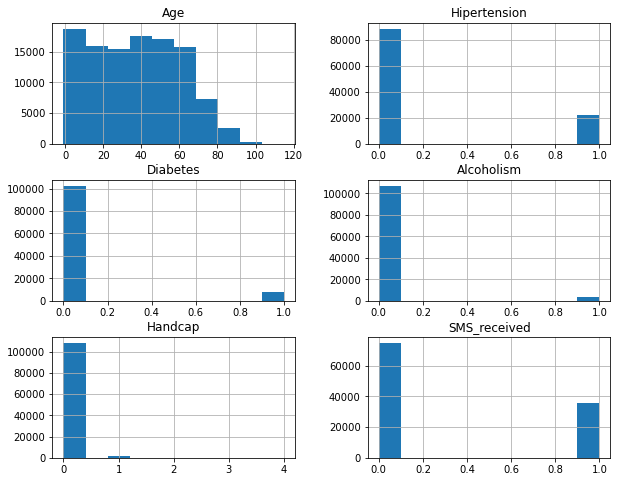

In [20]:
df.info()
df.hist(figsize=(10,8))

 New dataframe has ten columns

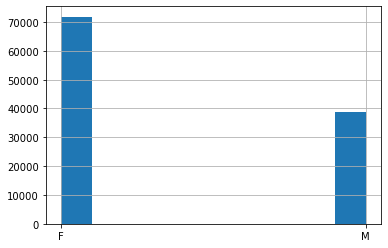

In [21]:
df.Gender.hist();

The hospital scheduled more females for appointment than males.

In [9]:
df.query('Gender=="F"').value_counts()

Gender  AppointmentDay        Age  Neighbourhood      Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
F       2016-05-06T00:00:00Z  55   CARATOÍRA          1             0         0           0        0             No         10
        2016-05-20T00:00:00Z  62   JARDIM CAMBURI     0             0         0           0        0             No          9
        2016-05-24T00:00:00Z  0    JESUS DE NAZARETH  0             0         0           0        0             No          9
        2016-06-06T00:00:00Z  54   JARDIM CAMBURI     0             0         0           0        1             No          8
        2016-05-19T00:00:00Z  52   JARDIM CAMBURI     0             0         0           0        0             No          8
                                                                                                                            ..
        2016-05-12T00:00:00Z  19   JARDIM CAMBURI     0             0         0           0        1             No  

60517 females had been scheduled for appointment from May to June, 2016.

In [10]:
df.query('Gender=="M"').value_counts()

Gender  AppointmentDay        Age  Neighbourhood   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
M       2016-05-25T00:00:00Z  9    GURIGICA        0             0         0           0        0             No         9
        2016-05-04T00:00:00Z  9    GURIGICA        0             0         0           0        0             No         9
        2016-05-09T00:00:00Z  0    GURIGICA        0             0         0           0        0             No         9
        2016-05-16T00:00:00Z  0    MARIA ORTIZ     0             0         0           0        0             No         8
        2016-05-19T00:00:00Z  49   JARDIM CAMBURI  0             0         0           0        0             No         8
                                                                                                                        ..
        2016-05-12T00:00:00Z  7    DA PENHA        0             0         0           0        1             No         1
                     

 33092 males had been scheduled for appointment from May to June, 2016.

In [22]:
df = df[df['No-show'] == "Yes"]

Dataframe is being filtered in order to have a new dataframe which contains only those that didn't show up for their appointments. 

In [23]:
df.shape

(22319, 10)

New dataframe shows out of 110517 scheduled for appointment, 22319 patients didn't show up.

In [24]:
df.head(20)

Gender        AppointmentDay  Age    Neighbourhood  Hipertension  \
6        F  2016-04-29T00:00:00Z   23       GOIABEIRAS             0   
7        F  2016-04-29T00:00:00Z   39       GOIABEIRAS             0   
11       M  2016-04-29T00:00:00Z   29   NOVA PALESTINA             0   
17       F  2016-04-29T00:00:00Z   40        CONQUISTA             0   
20       F  2016-04-29T00:00:00Z   30   NOVA PALESTINA             0   
21       F  2016-04-29T00:00:00Z    4        CONQUISTA             0   
22       M  2016-04-29T00:00:00Z   13        CONQUISTA             0   
31       M  2016-04-29T00:00:00Z   12   NOVA PALESTINA             0   
44       F  2016-04-29T00:00:00Z   78    SÃO CRISTÓVÃO             1   
48       F  2016-04-29T00:00:00Z   58    SÃO CRISTÓVÃO             0   
49       F  2016-04-29T00:00:00Z   27   GRANDE VITÓRIA             0   
50       F  2016-04-29T00:00:00Z   19   GRANDE VITÓRIA             0   
51       F  2016-04-29T00:00:00Z   23   GRANDE VITÓRIA             0   
52       F  2016-04-29T00:00:00Z   23   GRANDE VITÓRIA             0   
56       M  2016-04-29T00:00:00Z   12   NOVA PALESTINA             0   
61       F  2016-04-29T00:00:00Z    2   NOVA PALESTINA             0   
76       M  2016-04-29T00:00:00Z   28  ANTÔNIO HONÓRIO             0   
79       M  2016-04-29T00:00:00Z   67      MARIA ORTIZ             0   
90       M  2016-04-29T00:00:00Z   11      JUCUTUQUARA             0   
104      F  2016-04-29T00:00:00Z    0    SANTO ANTÔNIO             0   

     Diabetes  Alcoholism  Handcap  SMS_received No-show  
6           0           0        0             0     Yes  
7           0           0        0             0     Yes  
11          0           0        0             1     Yes  
17          0           0        0             0     Yes  
20          0           0        0             0     Yes  
21          0           0        0             0     Yes  
22          0           0        0             1     Yes  
31          0           0        0             0     Yes  
44          1           0        0             0     Yes  
48          0           0        0             1     Yes  
49          0           0        0             1     Yes  
50          0           0        0             1     Yes  
51          0           0        0             1     Yes  
52          0           0        0             1     Yes  
56          0           0        0             1     Yes  
61          0           0        0             0     Yes  
76          0           0        0             0     Yes  
79          0           0        0             1     Yes  
90          0           0        0             1     Yes  
104         0           0        0             0     Yes

In [25]:
df.describe()

Age  Hipertension      Diabetes    Alcoholism       Handcap  \
count  22319.000000  22319.000000  22319.000000  22319.000000  22319.000000   
mean      34.317667      0.169004      0.064071      0.030333      0.020297   
std       21.965941      0.374764      0.244885      0.171505      0.156670   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.000000      0.000000      0.000000      0.000000      0.000000   
50%       33.000000      0.000000      0.000000      0.000000      0.000000   
75%       51.000000      0.000000      0.000000      0.000000      0.000000   
max      115.000000      1.000000      1.000000      1.000000      4.000000   

       SMS_received  
count  22319.000000  
mean       0.438371  
std        0.496198  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

## QUESTION 1: what is the age range of those that didn't show up? 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

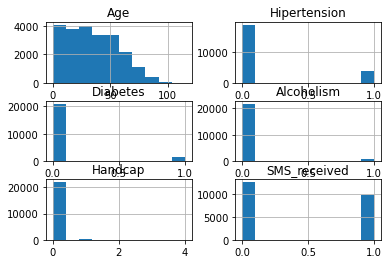

In [26]:
df.hist()

Plots and data description show that ages of patient that didn't show up range from zero to 115 years. Age is skewed to the left meaning most patients that didn't show up were young with ages 0-35 years having greater number. Also, patients that didn't show up rarely had Hipertension, Diabetes, Alcoholism and Handcap. Most of the patients that didn't show up had not received SMS reminding them of their appointments.

<AxesSubplot:title={'center':'Age distribution'}>

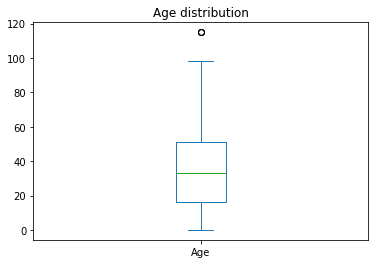

In [39]:
df['Age'].plot(kind='box', title='Age distribution')

Age is skewed to the left meaning most of the patients that didn't show up were young.

In [15]:
df.query('Gender=="M"').value_counts()

Gender  AppointmentDay        Age  Neighbourhood   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
M       2016-05-10T00:00:00Z  16   FORTE SÃO JOÃO  0             0         0           0        0             Yes        5
        2016-06-01T00:00:00Z  9    SÃO BENEDITO    0             0         0           1        0             Yes        5
                              86   ROMÃO           1             0         0           0        0             Yes        5
        2016-05-04T00:00:00Z  10   NOVA PALESTINA  0             0         0           0        0             Yes        5
                              9    SÃO BENEDITO    0             0         0           1        0             Yes        5
                                                                                                                        ..
        2016-05-11T00:00:00Z  71   DO MOSCOSO      1             0         0           0        0             Yes        1
                     

7106 males did not show up for appointment.

In [16]:
df.query('Gender=="F"').value_counts()

Gender  AppointmentDay        Age  Neighbourhood     Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
F       2016-05-03T00:00:00Z  44   JARDIM CAMBURI    0             0         0           0        0             Yes        6
                              63   CENTRO            0             0         0           1        0             Yes        6
        2016-05-16T00:00:00Z  46   JARDIM CAMBURI    0             0         0           0        0             Yes        5
        2016-05-09T00:00:00Z  41   MARIA ORTIZ       0             0         0           0        0             Yes        5
        2016-05-13T00:00:00Z  17   SÃO JOSÉ          0             0         0           0        0             Yes        4
                                                                                                                          ..
        2016-05-11T00:00:00Z  50   ILHA DO PRÍNCIPE  1             0         0           0        1             Yes        1
     

13406 females did not show up for appointment.

## QUESTION 2: Did those who didn't show up visit hospitals in the same neighbourhood? 

In [19]:
df.groupby('Neighbourhood').mean().SMS_received

Neighbourhood
AEROPORTO              0.000000
ANDORINHAS             0.337812
ANTÔNIO HONÓRIO        0.400000
ARIOVALDO FAVALESSA    0.290323
BARRO VERMELHO         0.384615
                         ...   
SÃO JOSÉ               0.422897
SÃO PEDRO              0.368932
TABUAZEIRO             0.434555
UNIVERSITÁRIO          0.375000
VILA RUBIM             0.531915
Name: SMS_received, Length: 80, dtype: float64

The mean of SMS_received in each neighborhood shows that patients that went to the hospital in AEROPORTO did not receive SMS. Probably the reason for not showing up.

## QUESTION 3: Does any health condition depend on a particular age group? 

<AxesSubplot:title={'center':'Plot of Hipertension against Age'}, xlabel='Age', ylabel='Hipertension'>

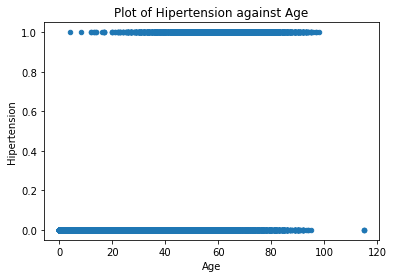

In [38]:
df.plot.scatter(x='Age', y='Hipertension', title='Plot of Hipertension against Age')

<AxesSubplot:title={'center':'Plot of Diabetes against Age'}, xlabel='Age', ylabel='Diabetes'>

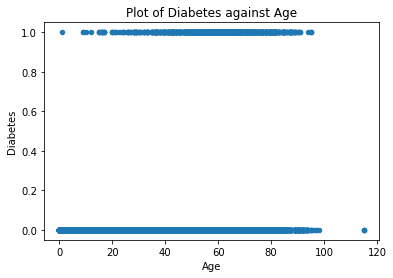

In [36]:
df.plot.scatter(x='Age', y='Diabetes', title='Plot of Diabetes against Age')

<AxesSubplot:title={'center':'Plot of Alcoholism against Age'}, xlabel='Age', ylabel='Alcoholism'>

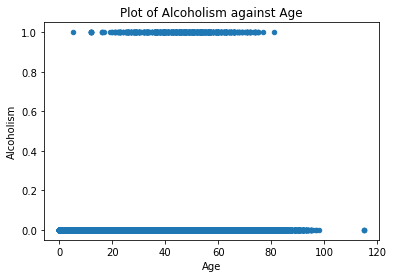

In [34]:
df.plot.scatter(x='Age', y='Alcoholism', title='Plot of Alcoholism against Age')

<AxesSubplot:title={'center':'Plot of Handcap against Age'}, xlabel='Age', ylabel='Handcap'>

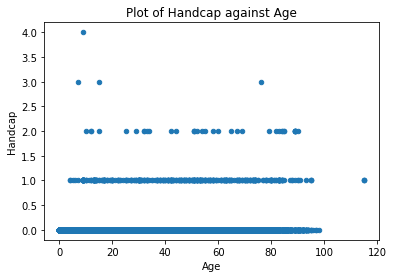

In [37]:
df.plot.scatter(x='Age', y='Handcap', title='Plot of Handcap against Age')

Plots show that the conditions hipertension, Diabetes and Handcap can affect people of any age group while alcoholism is less dominant in the 0-20 age group. 

# # QUESTION 4: Which month recorded the highest number of no-show appointment?

In [45]:
Appointments_for_April=df[df['AppointmentDay']== '2016-04-29T00:00:00Z']
Appointments_for_April.iloc[:, 1:].value_counts()

AppointmentDay        Age  Neighbourhood        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
2016-04-29T00:00:00Z  40   CENTRO               0             0         0           0        0             Yes        4
                      2    SÃO JOSÉ             0             0         0           0        1             Yes        4
                      21   BENTO FERREIRA       0             0         0           0        0             Yes        3
                      47   ILHA DE SANTA MARIA  0             0         0           0        1             Yes        3
                      2    SÃO JOSÉ             0             0         0           0        0             Yes        3
                                                                                                                     ..
                      20   ROMÃO                0             0         0           0        0             Yes        1
                           RESISTÊNCIA       

In [47]:
Appointments_for_June=df[df['AppointmentDay']>= '2016-06-01T00:00:00Z']
Appointments_for_June.iloc[:, 1:].value_counts()

AppointmentDay        Age  Neighbourhood     Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
2016-06-01T00:00:00Z  9    SÃO BENEDITO      0             0         0           1        0             Yes        5
                      86   ROMÃO             1             0         0           0        0             Yes        5
2016-06-07T00:00:00Z  65   JARDIM CAMBURI    0             0         0           0        1             Yes        4
                      36   JARDIM CAMBURI    0             0         0           0        1             Yes        4
2016-06-03T00:00:00Z  15   ILHA DO PRÍNCIPE  0             0         0           0        1             Yes        4
                                                                                                                  ..
                      7    CRUZAMENTO        0             0         0           0        1             Yes        1
                           DA PENHA          0             0         

Appointments for June with a No-show are 4489 while that of April is 592. Subtracting from the total number of No-show to make it that of May, we have 17238. Making May the highest number of No-show.  

# CONCLUSION

At the end of the analysis, we can conclude that out of 11057 patients that were booked for appointment, 22319 did not show up.7106 males and 13406 females did not show up for appointment. Ages of patients that didn't show up range from zero to 115 years. Of patients that didn't show up, age range 0-35 years are a greater number. Children are included in this age range and they will have to be accompanied by parents or guardians. These parents or guardians may have forgotten about the appointment due to their busy schedule or they may have not received SMS reminding them of their appointment. Alcoholism is a rare case among patients of the age group 0-20 years. The mean of SMS_received in each neighbourhood shows that patients that went to the hospital in AEROPORTO did not receive SMS.  This may be due to poor network in the hospital at AEROPORTO.Hence this may be another factor for patients not showing up. May recorded the highest number of no-show of appointment.
The data limited the analysis as to whether patients visited with other health conditions as only data on Hipertension, Diabetes, Alcoholism and Handcap were given. Patients may have visited the hospital with other health conditions.

# REFERENCES

https://www.w3resource.com/pandas/dataframe/dataframe-count.php

www.problemsolvingwithpython.com